In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pydataset import data
print(sns.get_dataset_names())

#url = get_db_url('iris_db')


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [2]:
iris = data('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


1. What does the distribution of petal lengths look like?

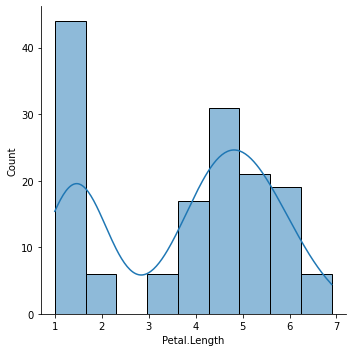

In [3]:
sns.displot(data = iris, x = "Petal.Length", kde=True)

2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

<AxesSubplot:>

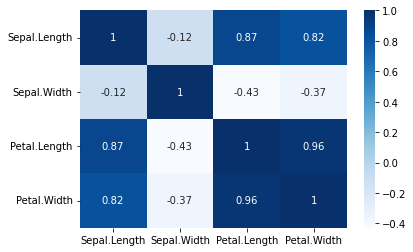

In [4]:
sns.heatmap(iris.corr(), annot = True, cmap = 'Blues')

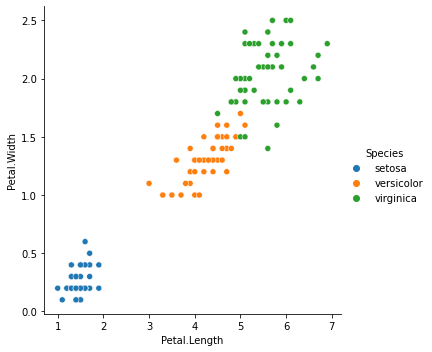

In [5]:
sns.relplot(data = iris, x = 'Petal.Length' , y = 'Petal.Width', hue = 'Species')


3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

No

In [6]:
#sns.catplot(data = iris, )
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

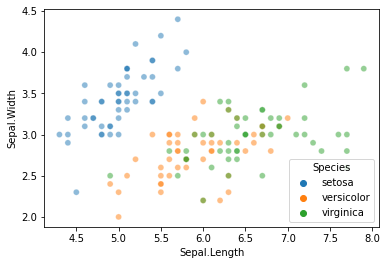

In [7]:
sns.scatterplot(data = iris, 
            x = 'Sepal.Length',
            y = 'Sepal.Width',
            hue = 'Species', 
            alpha = 0.5)

4. Which features would be best used to predict species?

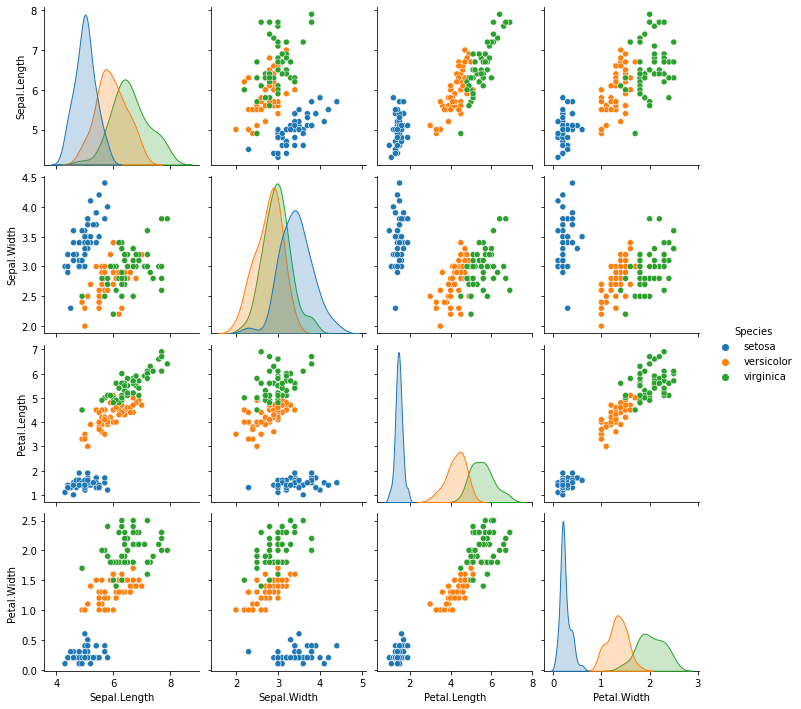

In [8]:
sns.pairplot(iris, hue = "Species")

Petal width is the best predictor

## Exercises 2

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [9]:
anscombe = sns.load_dataset('anscombe')

In [10]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [11]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [12]:
# anscombe = pd.DataFrame(anscombe)

In [13]:
anscombe.groupby('dataset')[['x', 'y']].agg(['sum', 'mean', 'std'])


x                     y                    
          sum mean       std    sum      mean       std
dataset                                                
I        99.0  9.0  3.316625  82.51  7.500909  2.031568
II       99.0  9.0  3.316625  82.51  7.500909  2.031657
III      99.0  9.0  3.316625  82.50  7.500000  2.030424
IV       99.0  9.0  3.316625  82.51  7.500909  2.030579

In [14]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

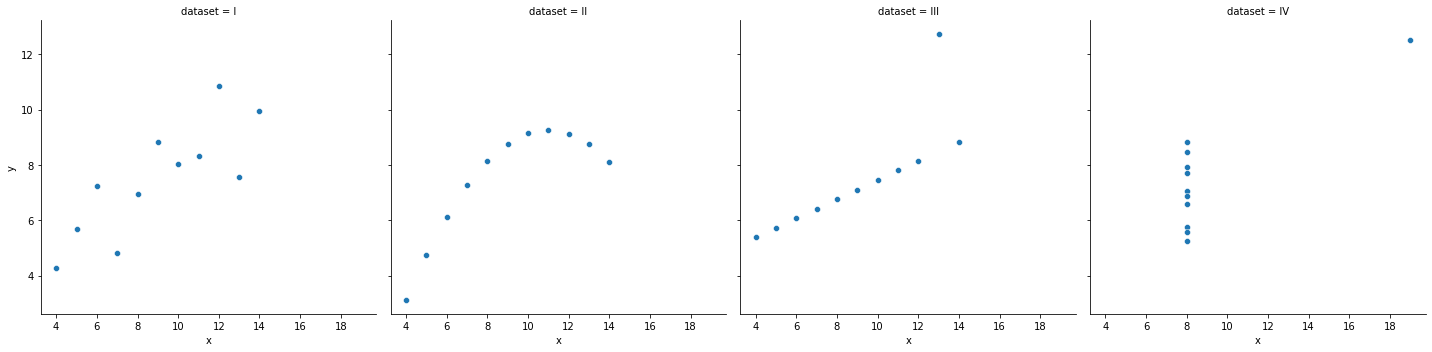

In [44]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')
# col argument is great for separating datasets after a groupby
# plot and visualize data, don't just rely on summary data

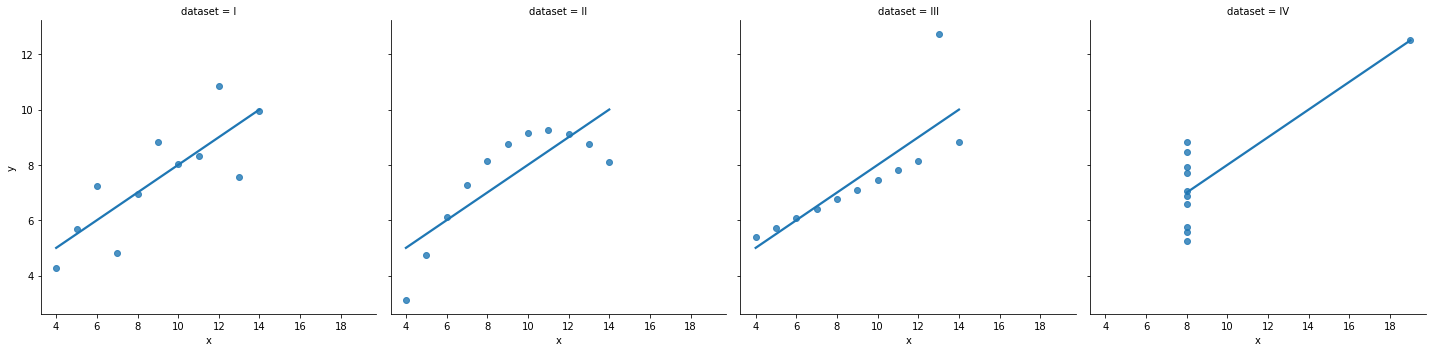

In [46]:
sns.lmplot(data = anscombe, x = 'x', y = 'y', col = 'dataset', ci = 0)
#lm plot is the linear model plot, shows a quick line of best fit

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [16]:
from pydataset import data

In [17]:
insect_sprays = data('InsectSprays')
insect_sprays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [18]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [19]:
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [20]:
insect_sprays.value_counts('spray')

spray
A    12
B    12
C    12
D    12
E    12
F    12
dtype: int64

<AxesSubplot:xlabel='spray', ylabel='count'>

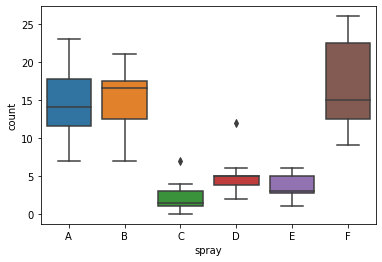

In [21]:
sns.boxplot( data = insect_sprays, x = 'spray', y = "count")

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

A. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

B. Does whether or not a province is Catholic influence fertility?

C. What measure correlates most strongly with fertility?

In [51]:
#insect_sprays = data('InsectSprays')
#insect_sprays.info()
swiss = data('swiss')

In [52]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [53]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [54]:
swiss.value_counts()

Fertility  Agriculture  Examination  Education  Catholic  Infant.Mortality
35.0       1.2          37           53         42.34     18.0                1
79.3       63.1         13           13         96.83     18.1                1
72.0       63.5         6            3          2.56      18.0                1
72.5       71.2         12           1          2.40      21.0                1
72.7       16.7         22           13         11.22     18.9                1
74.2       58.1         14           8          5.23      23.8                1
75.5       85.9         3            2          99.71     15.1                1
76.1       35.3         9            7          90.57     26.6                1
76.9       43.5         17           15         5.16      20.6                1
77.3       89.7         5            2          100.00    18.3                1
77.6       37.6         15           7          4.97      20.0                1
79.4       64.9         7            3       

In [55]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


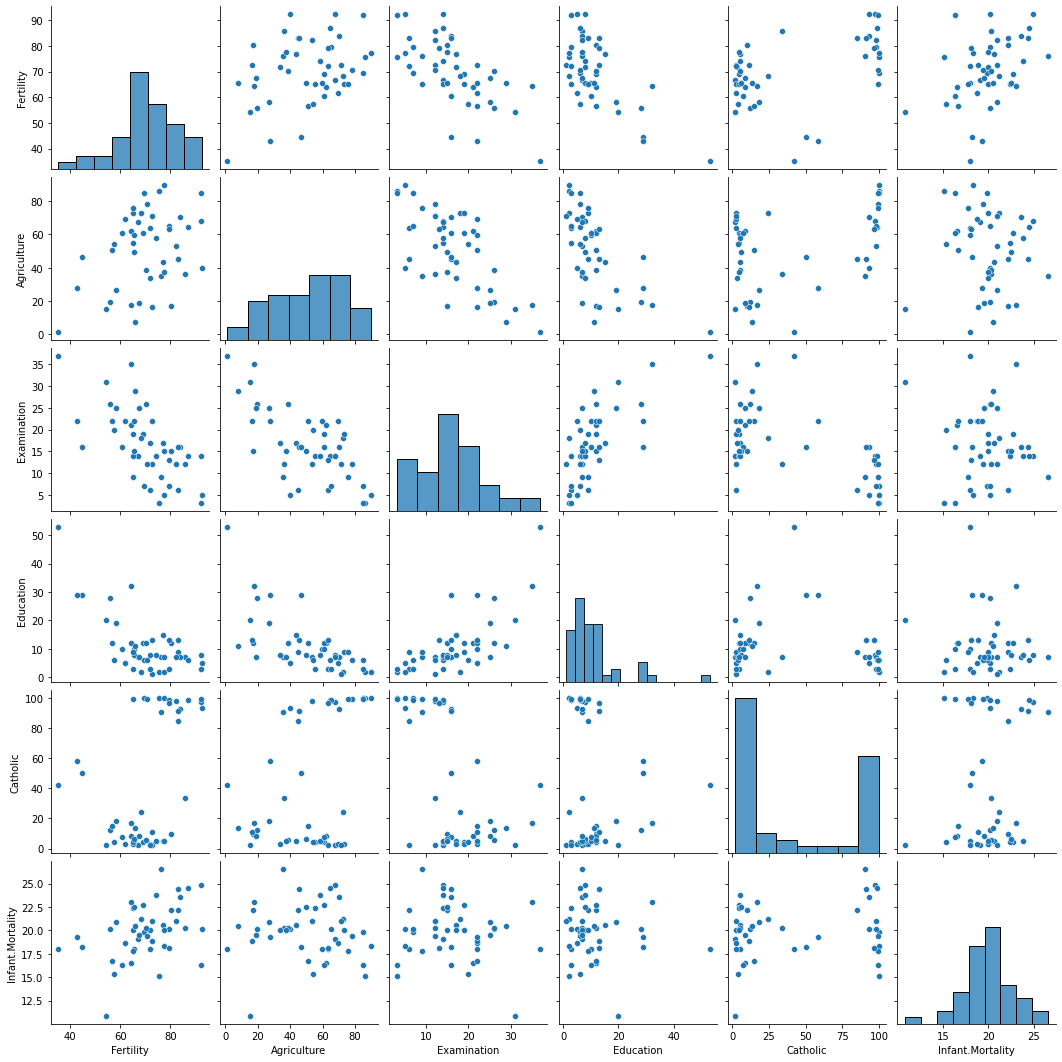

In [56]:
sns.pairplot(data = swiss)

In [58]:
swiss['is_catholic'] = swiss.Catholic > 45

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

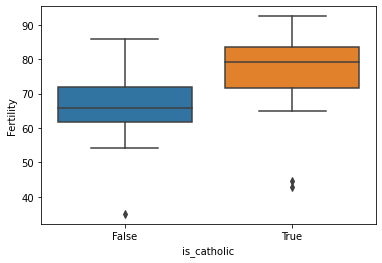

In [61]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

In [30]:
fertility_stats = swiss.groupby('is_catholic')[['Fertility']].agg(['median', 'mean', 'std'])
fertility_stats

Fertility                      
               median       mean        std
is_catholic                                
False           65.70  66.220690   9.613881
True            79.35  76.461111  14.194702

In [31]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


<AxesSubplot:>

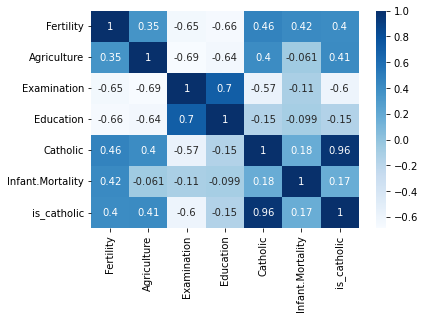

In [32]:
sns.heatmap(swiss.corr(), cmap = 'Blues', annot = True)

In [33]:
swiss.corr()[["Fertility"]]

,Fertility
Fertility,1.000000
Agriculture,0.353079
Examination,-0.645883
Education,-0.663789
Catholic,0.463685
Infant.Mortality,0.416556
is_catholic,0.402813


4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [34]:
from env import get_db_url

In [35]:
url = get_db_url('chipotle')
orders = pd.read_sql('SELECT * FROM orders', url)

In [36]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [37]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [42]:
orders.item_price = orders.item_price.str.replace('$','').astype(float)
orders

/var/folders/3n/86q7c8d16r51w8vg4g5kwq280000gn/T/ipykernel_40605/2591159273.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders.item_price = orders.item_price.str.replace('$','').astype(float)


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [79]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)

In [80]:
best_sellers.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [83]:
top_sellers = orders[orders.item_name.isin(best_sellers.index)]

In [86]:
revenue = top_sellers.groupby('item_name').item_price.sum()

In [88]:
sns.barplot(data = orders, x = "revenue.index", y = "revenue.values")

ValueError: Could not interpret input 'revenue.index'

In [40]:
sleepstudy = data('sleepstudy')

In [41]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


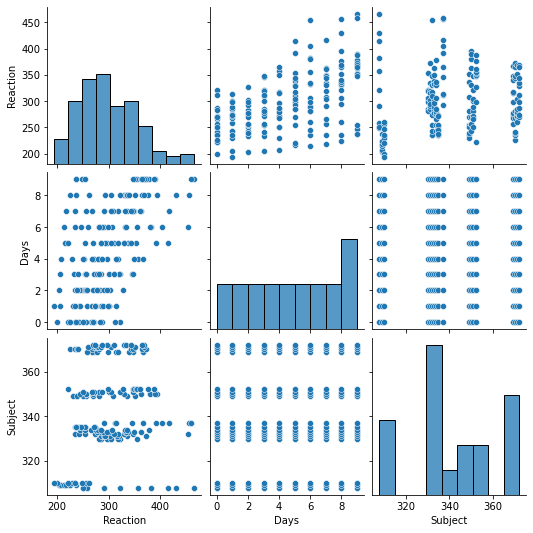

In [47]:
sns.pairplot(sleepstudy)

In [71]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [73]:
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

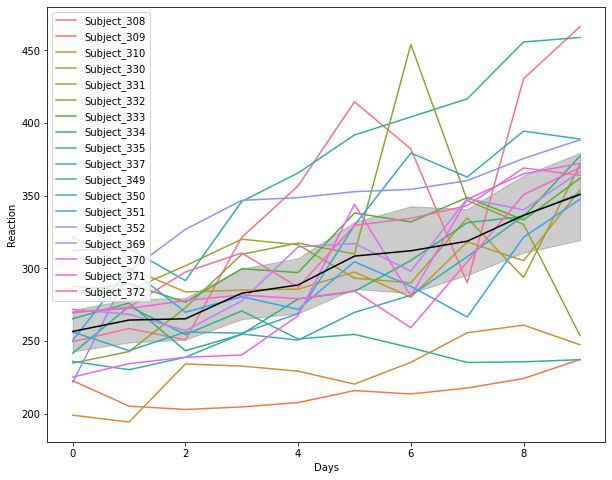

In [74]:
plt.figure(figsize = (10,8))
sns.lineplot(data = sleepstudy, y = "Reaction", x = "Days", hue = "Subject")
sns.lineplot(data = sleepstudy, y = "Reaction", x = "Days", color = "black") #mean line 

